# 2. Business Intelligence for Marketing

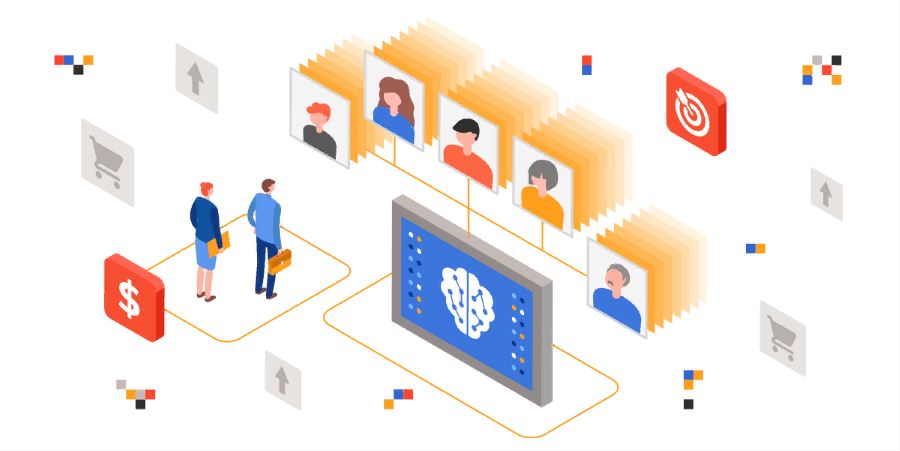

## Проблема
Маркетинг, как известно, имеет решающее значение для роста и устойчивости любого бизнеса. Однако одним из ключевых болевых моментов для любого специалиста по маркетингу является знание клиентов и определение их потребностей. Ваша задача состоит в том, чтобы создать модель для выполнения группировки клиентов.

## Данные
Набор данных содержит 17 объектов и 8950 записей. Как показано на рис.1, речь идет о покупательских и платежных привычках клиента, таких как то, как часто клиент делает одноразовые или рассроченные покупки, или как часто он делает денежные авансы, сколько платежей производится и т. Д. Изучая каждого клиента, мы можем определить, какой тип покупки ему нравится, или он предпочитает наличные авансы покупкам.

* CUSTID : Идентификация владельца кредитной карты (Категориальная)
* BALANCE : Сумма баланса, оставшаяся на их счете для совершения покупок (
* BALANCE_FREQUENCY : Как часто обновляется баланс, оценка от 0 до 1 (1 = часто обновляется, 0 = не часто обновляется)
* PURCHASES : Сумма покупок, сделанных со счета
* ONEOFF_PURCHASES : Максимальная сумма покупки, сделанная за один раз
* INSTALLMENTS_PURCHASES : Сумма покупки, сделанной в рассрочку
* CASH_ADVANCE : Наличные деньги заранее выданные пользователем
* PURCHASES_FREQUENCY : Как часто совершаются покупки, оценка от 0 до 1 (1 = часто покупается, 0 = не часто покупается)
* ONEOFF_PURCHASES_FREQUENCY : Как часто покупки происходят за один раз (1 = часто покупается, 0 = не часто покупается)
* PURCHASES_INSTALLMENTS_FREQUENCY : Как часто делаются покупки в рассрочку (1 = часто делаются, 0 = не часто делаются)
* CASH_ADVANCE_FREQUENCY : Как часто выплачиваются авансовые платежи наличными
* CASH_ADVANCE_TRX : Количество транзакций, совершенных с помощью "Cash in Advanced"
* PURCHASES_TRX : Количество совершенных сделок покупки
* CREDIT_LIMIT : Лимит кредитной карты для пользователя
* PAYMENTS : Сумма платежа, произведенного пользователем
* MINIMUM_PAYMENTS : Минимальная сумма платежей, произведенных пользователем
* PRC_FULL_PAYMENT : Процент от полного платежа, оплаченного пользователем
* TENURE : Срок действия услуги кредитной карты для пользователя

## Первичный анализ

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [66]:
df = pd.read_csv('/content/Marketing_data.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [67]:
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [68]:
df.isna().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
TENURE                                0
PURCHASES_FREQUENCY                   0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
ONEOFF_PURCHASES_FREQUENCY            0
PRC_FULL_PAYMENT                      0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
PAYMENTS                              0
CUST_ID                               0
dtype: int64

* Средний баланс 1564
* Частота баланса часто обновляется в среднем ~0,9(часто обновляется)
* Средняя сумма покупок 1000
* Единовременная сумма покупок 600
* Средняя частота покупок составляет около 0,5
* средней частоты ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY и CASH_ADVANCE_FREQUENCY, как правило, низкие
* Средний кредитный лимит ~ 4500
* Процент от полной оплаты составляет 15%
* Средний срок действия кредитки 11 лет
* 313 пропусков в столбце минимальной суммы платежа

In [69]:
# Заменим пропуски стредними значениями
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean())
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean())

In [70]:
df.drop("CUST_ID",axis=1,inplace=True)

In [71]:
n = len(df.columns)
n

17

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

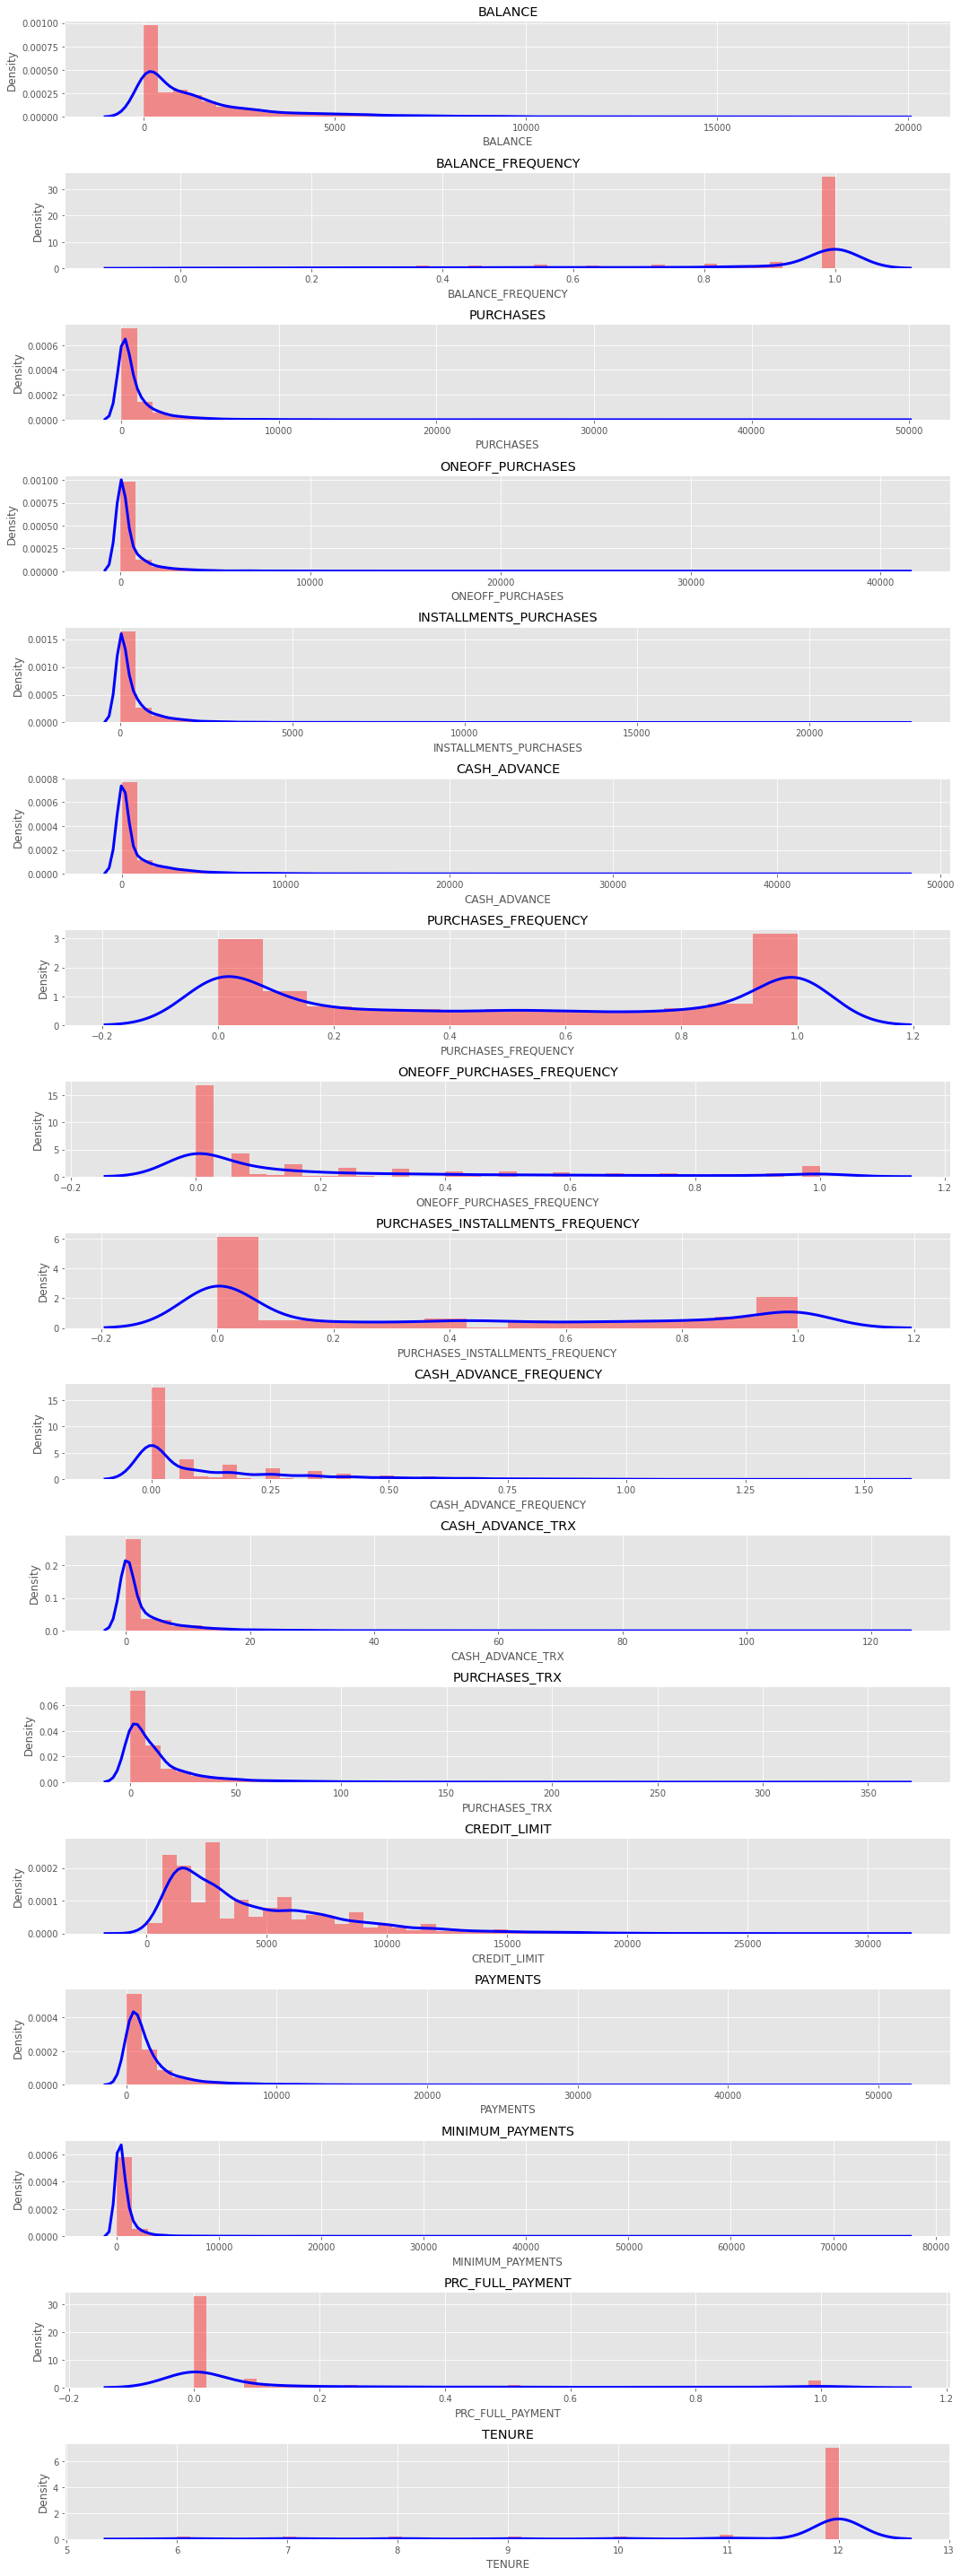

In [72]:
plt.figure(figsize=(15,40))
for i in range(n):
  plt.subplot(17,1,i+1)
  sns.distplot(df[df.columns[i]],kde_kws={'color':'b','lw':3,'label':'KDE'},hist_kws={'color':'r'})
  plt.title(df.columns[i])
plt.tight_layout()

* Среднее значение баланса 1500
* "Balance_Frequency" для большинства клиентов обновляется часто ~1
* Для "PURCHASES_FREQUENCY" существуют две различные группы клиентов
* Для "ONE OFF_PURCHASES_FREQUENCY" и "PURCHASES_INSTALLMENT_FREQUENCY" большинство пользователей не часто делают одноразовые покупки или покупки в рассрочку
* Малое количество клиентов оплачивают свой баланс в полном объеме 'FORCE_FULL_PAYMENT'~0
* Средний кредитный лимит составляет около 4500
* Большинство клиентов имеют срок службы ~11 лет

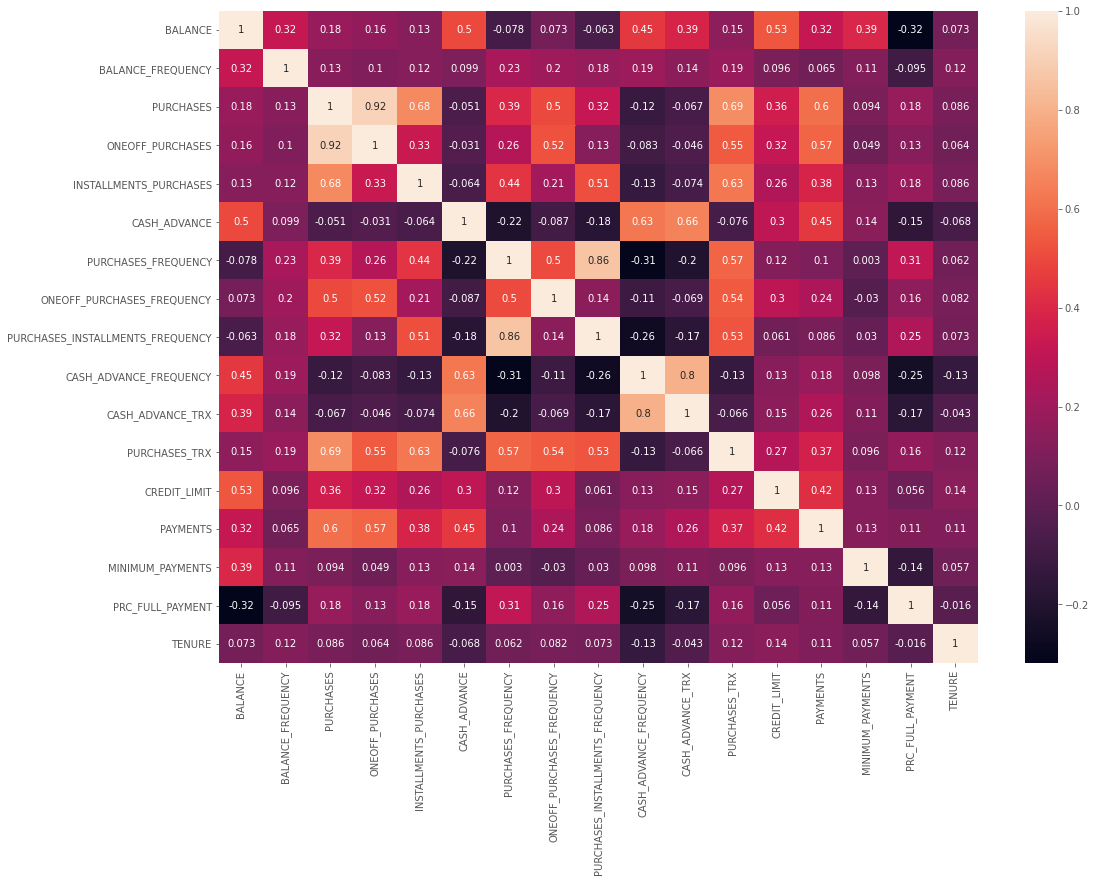

In [73]:
corr = df.corr()
plt.figure(figsize=(17,12))
sns.heatmap(corr, annot=True)

* 'PURCHASES' имеет вфсокую корреляцию с 'installment purchases, purchase transactions, credit limit и payments. 
* сильнаная корреляция и у 'PURCHASES_FREQUENCY' и'PURCHASES_INSTALLMENT_FREQUENCY'

## Найдем оптимальное число кластеров с помощью K-Means

Некоторые функции, такие как "PURCHASES", варьируются в широком диапазоне, в то время как другие функции, такие как "PURCHASES_FREQUENCY", варьируются от 0 до 1. Нам нужно масштабировать все функции в одном диапазоне. Здесь мы используем StandardScaler() из sklearn для удаления среднего значения и масштабирования до единичной дисперсии.

In [74]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_data.shape

(8950, 17)

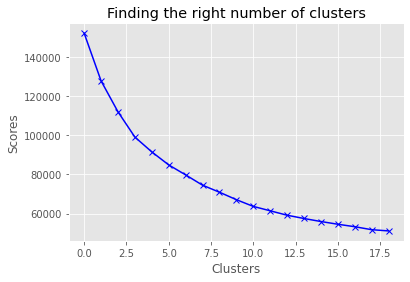

In [75]:
scores_1 = []

range_values = range(1,20)
for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_data)
    scores_1.append(kmeans.inertia_)
plt.plot(scores_1, 'bx-')
plt.style.use('ggplot')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()

Чтобы определить оптимальное число кластеров, мы должны выбрать значение k в “локте”, то есть точке, после которой искажение/инерция начинают линейно уменьшаться. Таким образом, мы приходим к выводу, что оптимальное число кластеров равно 8.

Определив оптимальное количество кластеров, применим k-среднее и спрогнозируем кластер каждой выборки. 

In [76]:
kmeans = KMeans(n_clusters = 8, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(scaled_data)
labels = kmeans.labels_

In [77]:
kmeans.cluster_centers_.shape

(8, 17)

In [78]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_,columns = [df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.163402,0.391248,0.473721,0.618352,-0.016063,-0.333106,0.942960,1.878289,0.089511,-0.407423,-0.323186,0.531595,0.382607,0.101509,-0.162531,0.414270,0.262216
1,0.018292,0.403845,-0.361977,-0.247214,-0.401602,-0.090374,-0.866755,-0.409889,-0.758381,0.112001,-0.022665,-0.486904,-0.305746,-0.249583,-0.003799,-0.457045,0.272736
2,0.934901,0.467049,2.252953,1.707412,2.190297,-0.192704,1.160751,1.548096,1.257221,-0.310075,-0.208712,2.800594,1.235324,1.282259,0.575854,0.273318,0.333736
3,-0.701368,-2.145072,-0.312447,-0.237526,-0.302285,-0.321782,-0.556727,-0.445738,-0.439325,-0.520713,-0.376018,-0.419883,-0.177196,-0.203414,-0.256627,0.280785,0.199062
4,1.690481,0.391576,-0.218284,-0.156544,-0.228597,2.029267,-0.478632,-0.213098,-0.415543,1.925902,1.940330,-0.267148,1.031162,0.825654,0.512697,-0.390593,0.068883
5,-0.366740,0.333338,-0.038539,-0.244303,0.357516,-0.363619,0.990253,-0.387060,1.205496,-0.475146,-0.361200,0.186769,-0.261316,-0.217940,-0.045979,0.314959,0.257484
6,-0.336050,-0.347078,-0.289267,-0.215966,-0.286835,0.068284,-0.203078,-0.288661,-0.224549,0.308663,0.000996,-0.388117,-0.567159,-0.392680,-0.209145,0.014011,-3.203733
7,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044064,8.098975,1.120318,1.110132,0.310863


In [79]:
# Чтобы понять, что означают эти числа, давайте выполним обратное преобразование
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers,columns = [df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1224.366953,0.969954,2015.317861,1618.775433,396.542428,280.332907,0.868806,0.762788,0.400011,0.053615,1.043321,27.923285,5886.531835,2027.002176,485.436049,0.274882,11.868231
1,1602.548699,0.972938,229.834652,182.112608,47.904053,789.351604,0.142480,0.080180,0.063037,0.157557,3.094152,2.607209,3382.021577,1010.625996,855.352328,0.020037,11.882310
2,3510.393168,0.987910,5816.674519,3426.390962,2391.725865,574.762188,0.956216,0.664285,0.864089,0.073095,1.824519,84.322115,8989.062500,5445.158665,2206.210364,0.233656,11.963942
3,104.637027,0.369123,335.656938,198.193215,137.715462,304.079507,0.266909,0.069485,0.189838,0.030944,0.682782,4.273113,3849.736594,1144.281146,266.148080,0.235839,11.783715
4,5083.068323,0.970031,536.838447,332.605956,204.350301,5234.339850,0.298252,0.138886,0.199290,0.520537,16.490151,8.069525,8246.239334,4123.330014,2059.024786,0.039473,11.609502
5,801.136827,0.956236,920.865753,186.944441,734.365067,216.346127,0.887787,0.086990,0.843532,0.040063,0.783905,19.352211,3543.676206,1102.229857,757.053521,0.245835,11.861898
6,865.015978,0.795051,385.181720,233.977974,151.686061,1122.064941,0.408846,0.116344,0.275196,0.196911,3.255627,5.062701,2430.891398,596.373827,376.802926,0.157813,7.229904
7,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333


In [80]:
y_kmeans = kmeans.fit_predict(scaled_data)
y_kmeans

array([1, 4, 0, ..., 6, 6, 6], dtype=int32)

In [81]:
creditcard_df_cluster = pd.concat([df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,4
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


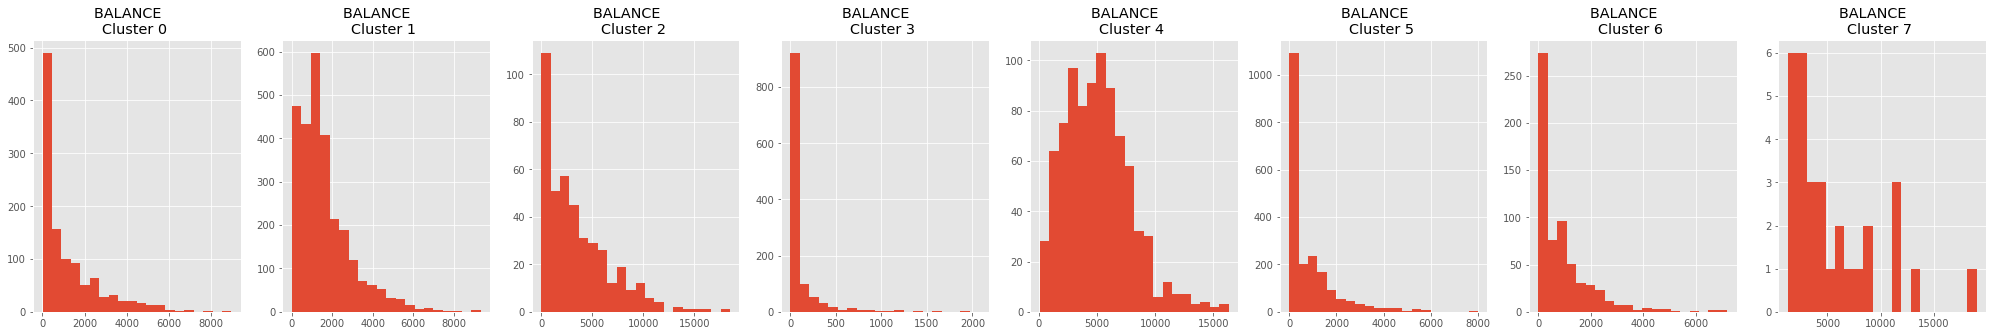

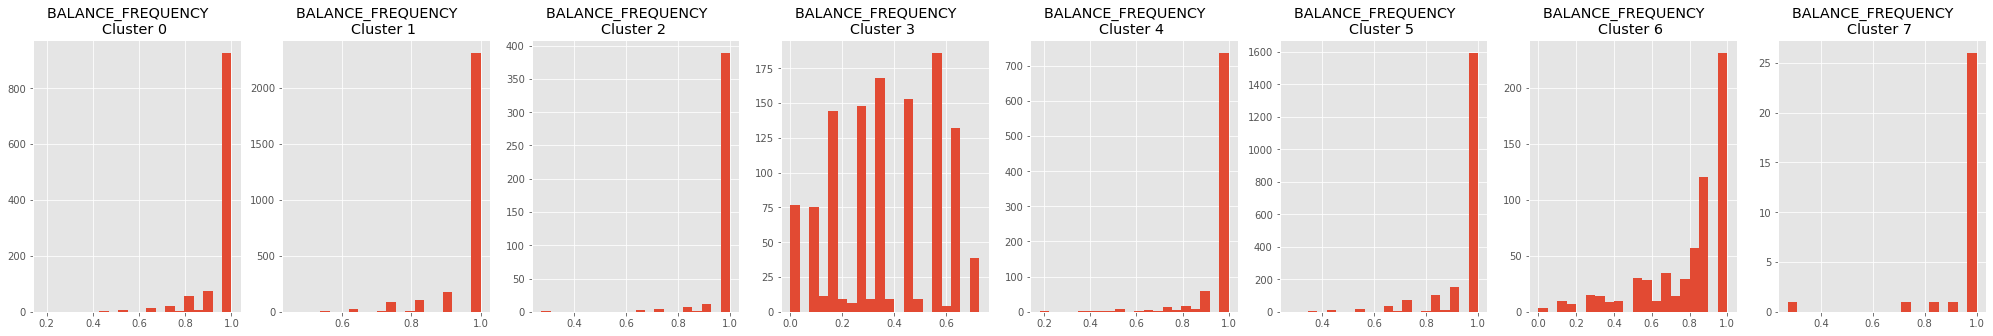

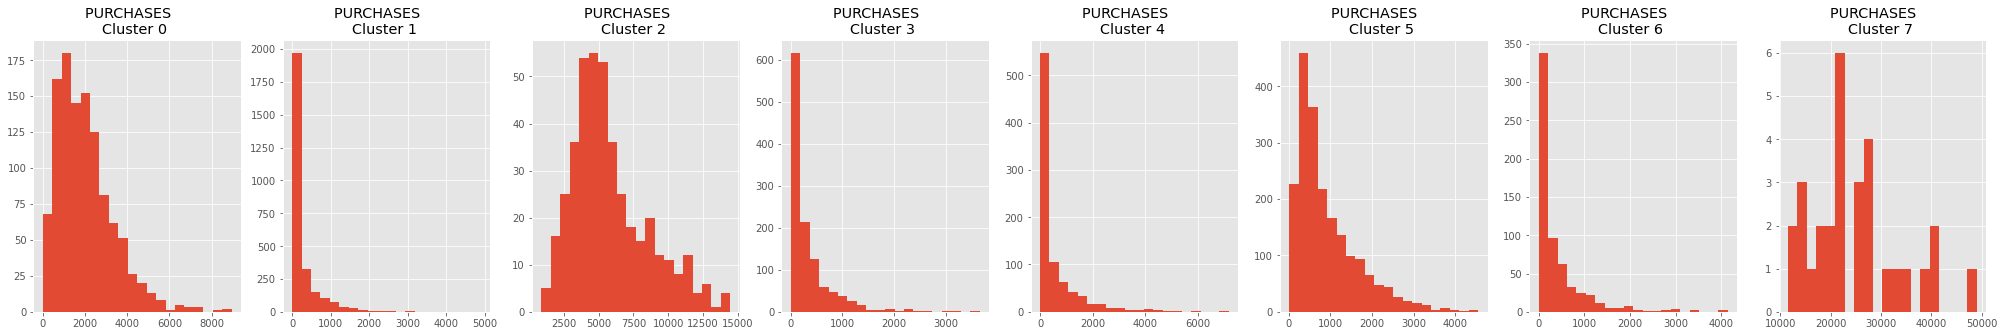

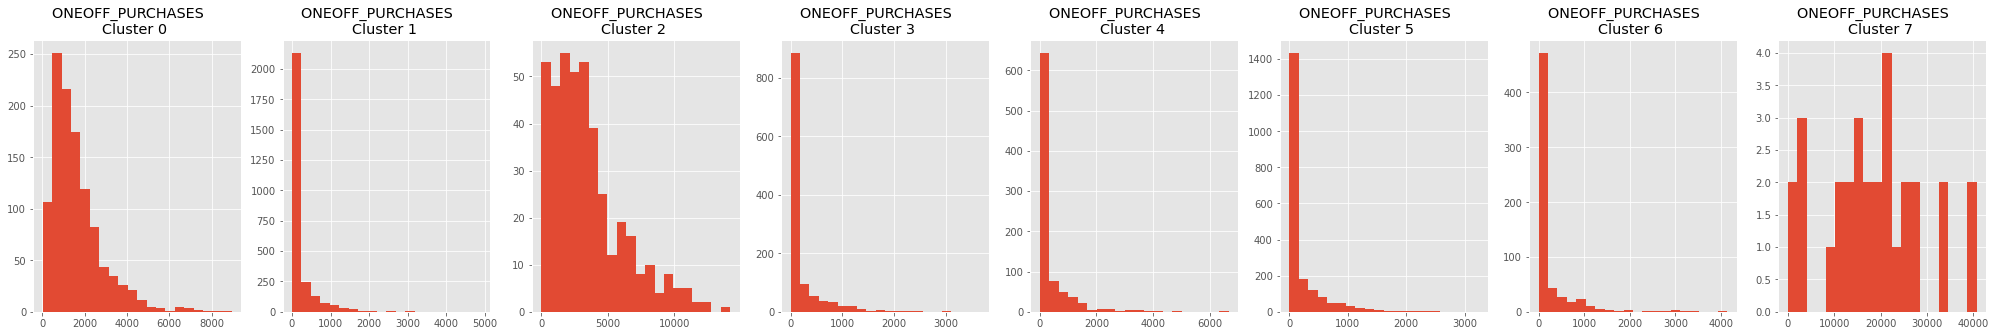

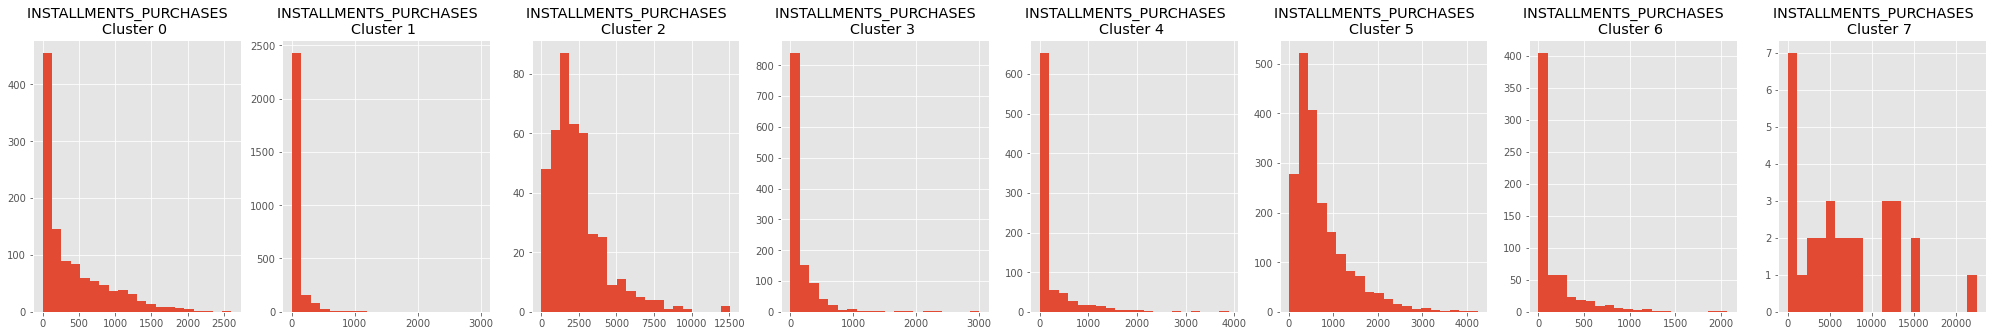

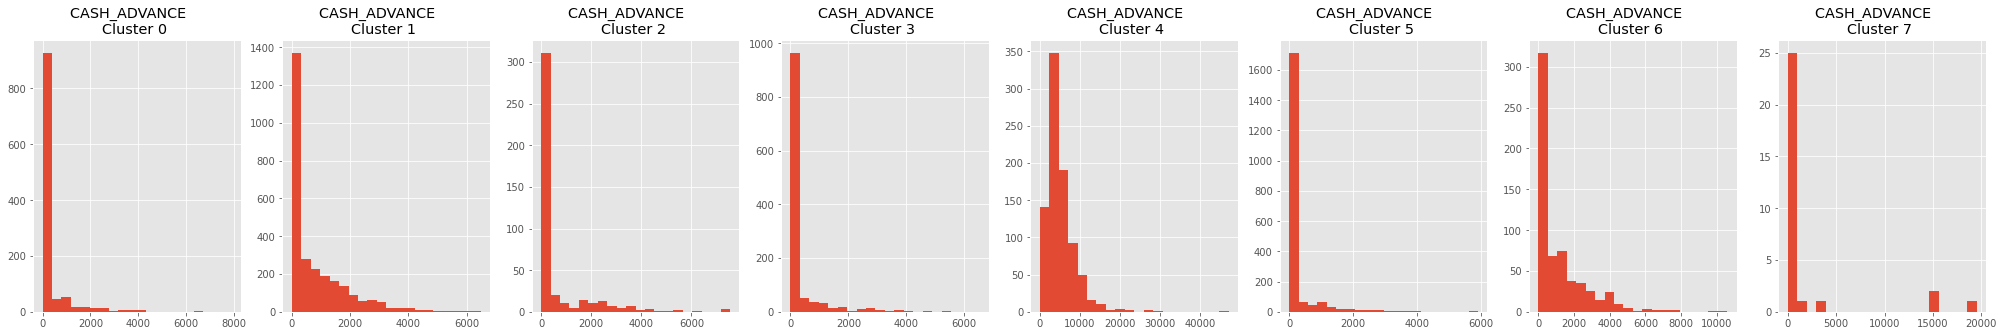

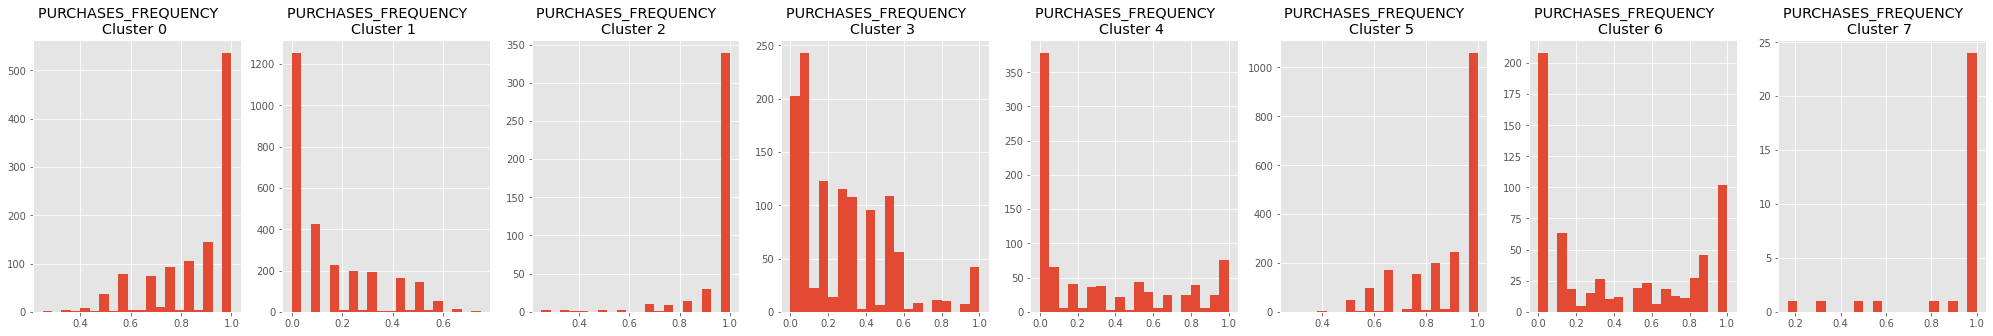

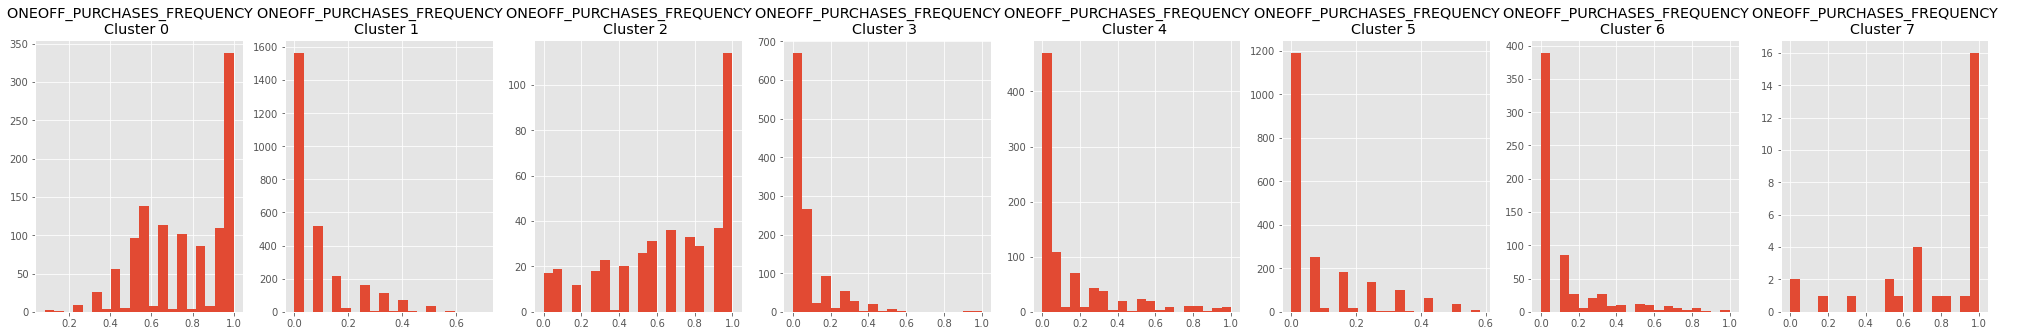

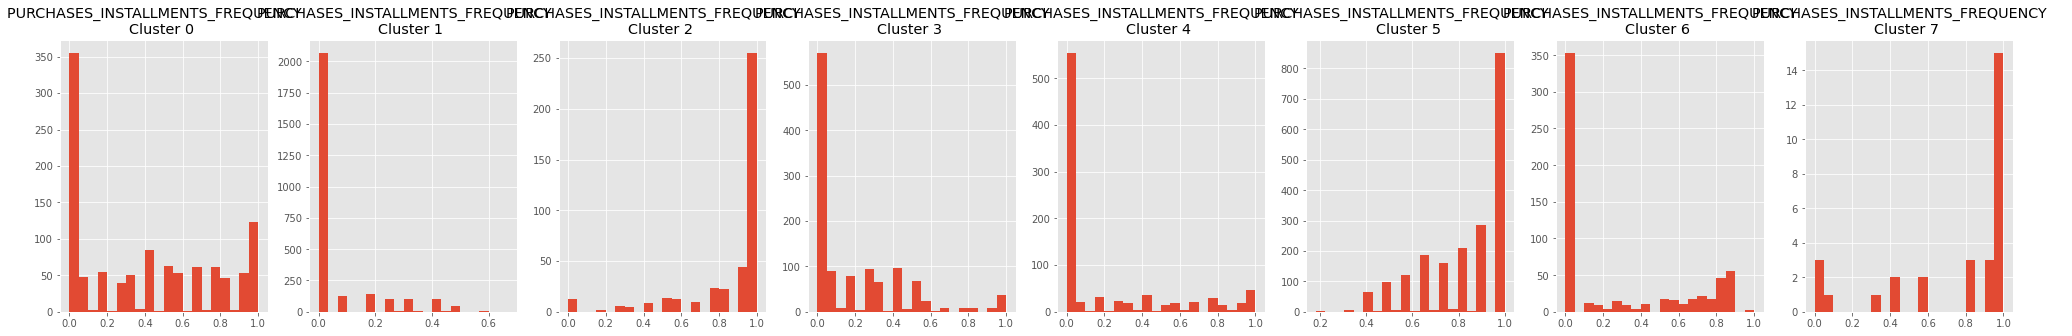

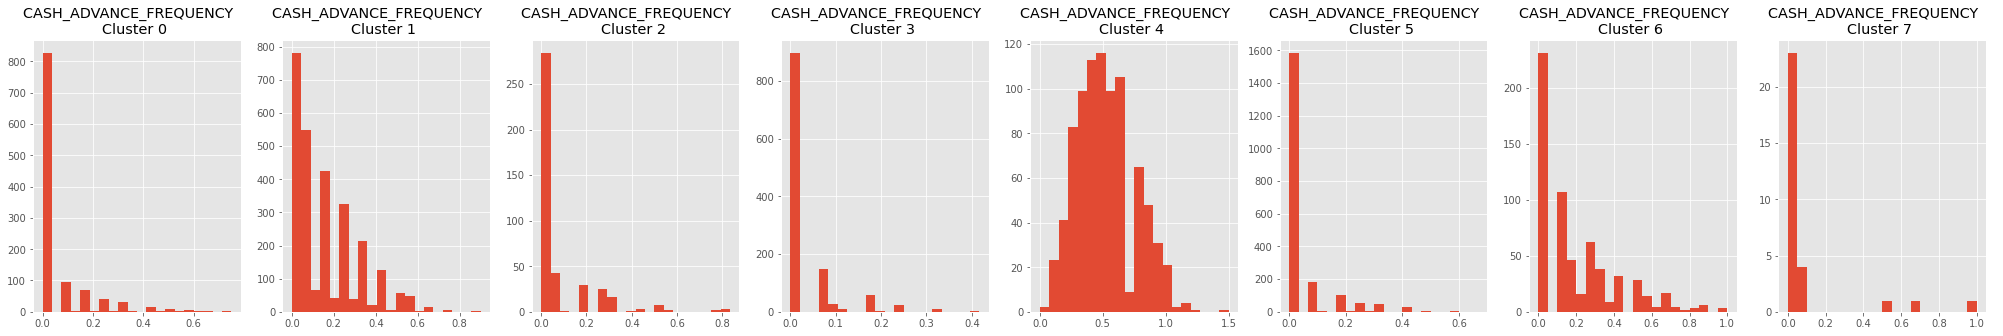

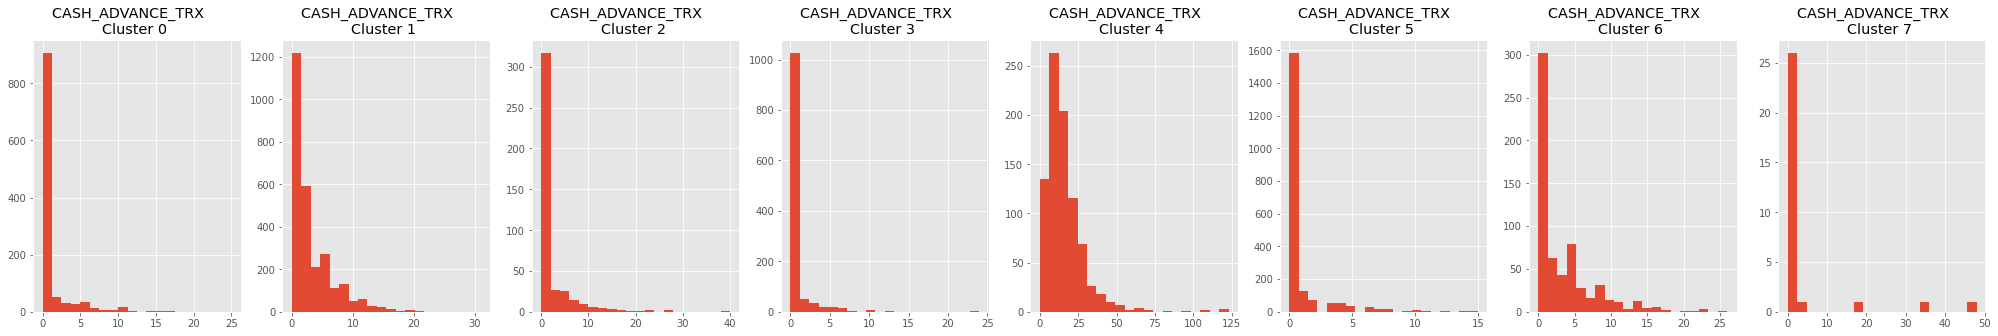

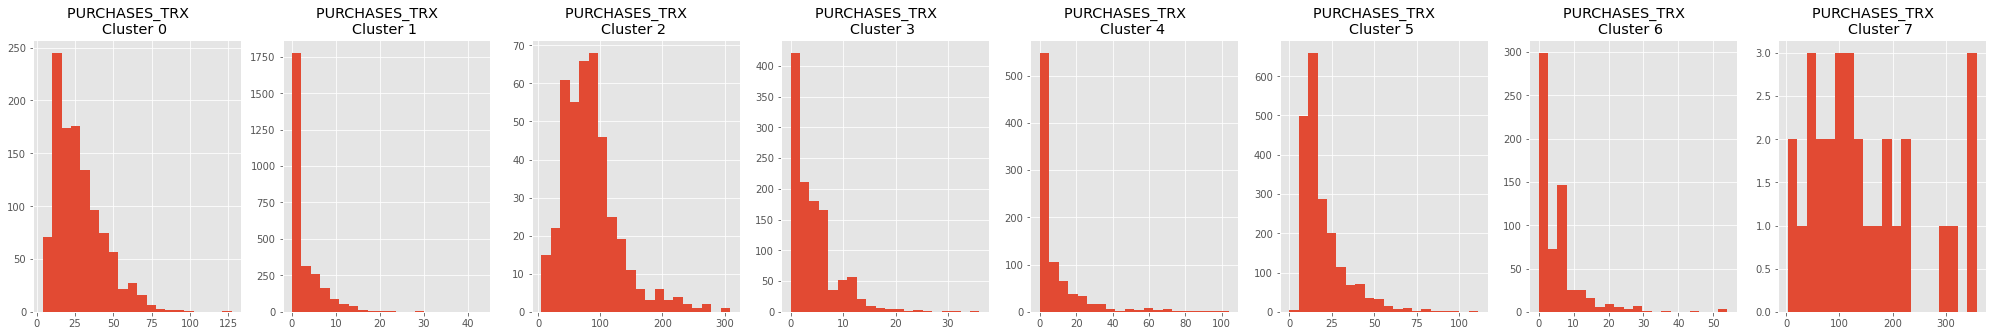

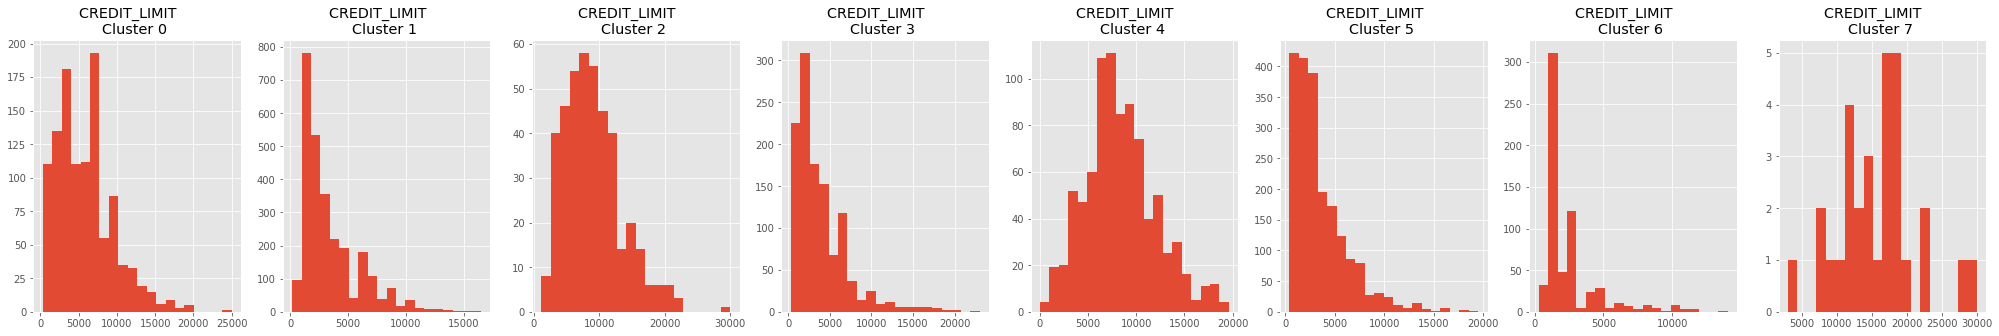

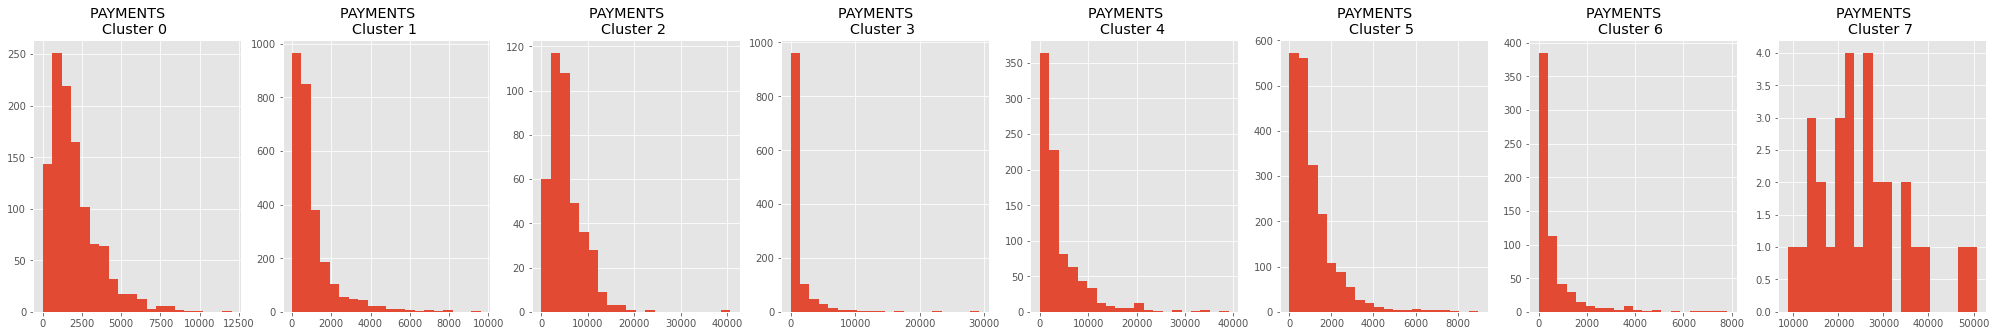

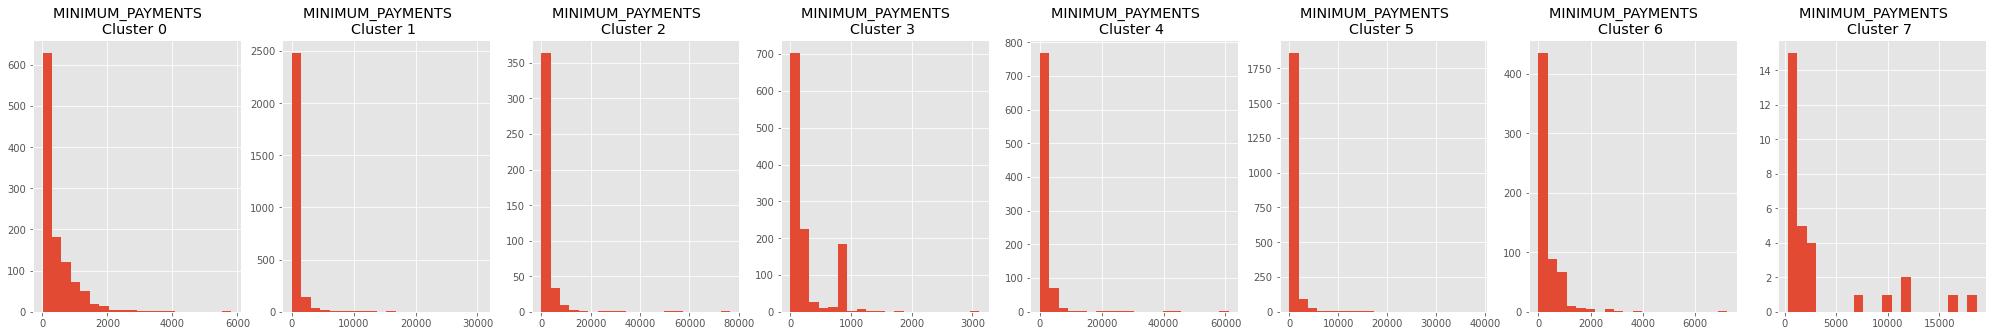

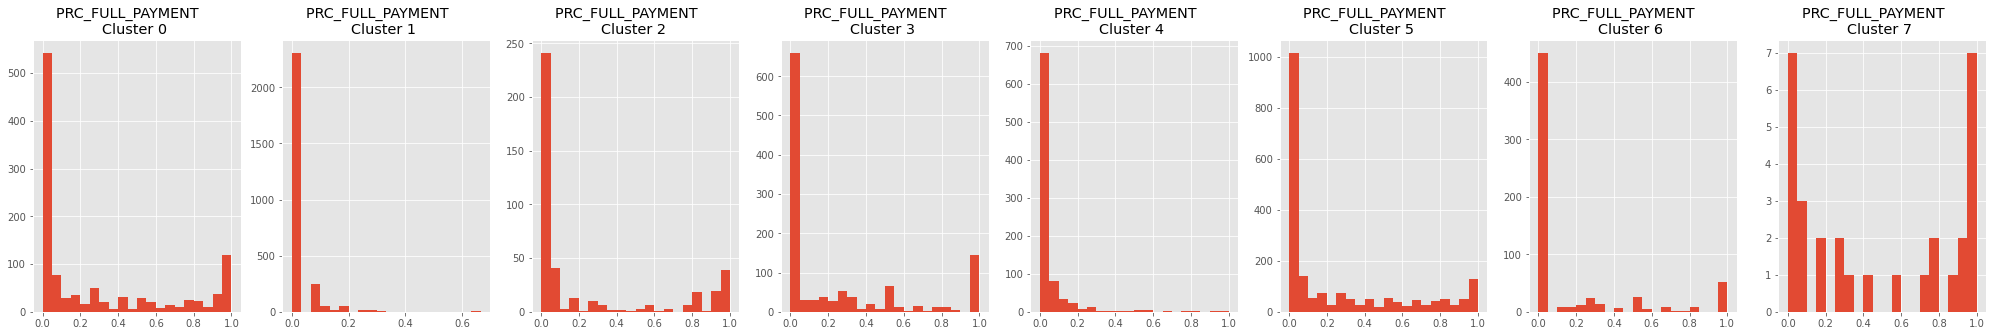

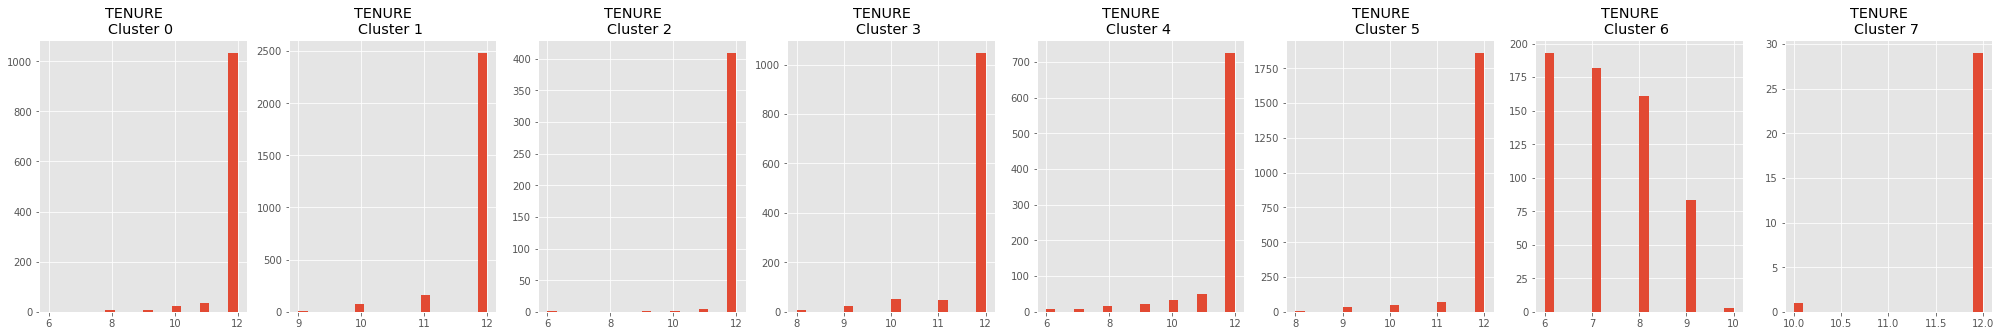

In [82]:
for i in df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()

## Применим анализ главных компонент и визуализация результатов

In [83]:
# получим основные компоненты
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(scaled_data)
principal_comp

array([[-1.68222462, -1.07645077],
       [-1.13828526,  2.50648257],
       [ 0.96964124, -0.38351277],
       ...,
       [-0.92620713, -1.81078966],
       [-2.33655016, -0.65797213],
       [-0.55642719, -0.40046539]])

In [84]:
# Создаем фрейм данных с двумя компонентами
pca_df = pd.DataFrame(data=principal_comp,columns=['pca1','pca2'])
pca_df.sample(5)

,pca1,pca2
1393,-1.309490,0.495557
5435,-2.560001,-0.779030
2709,4.759034,-0.839023
1071,1.025780,-2.342999
7509,-1.994048,-1.240892


In [85]:
# объединяем метки кластеров с фреймом данных
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682225,-1.076451,1
1,-1.138285,2.506483,4
2,0.969641,-0.383513,0
3,-0.873622,0.043168,1
4,-1.599440,-0.688582,1


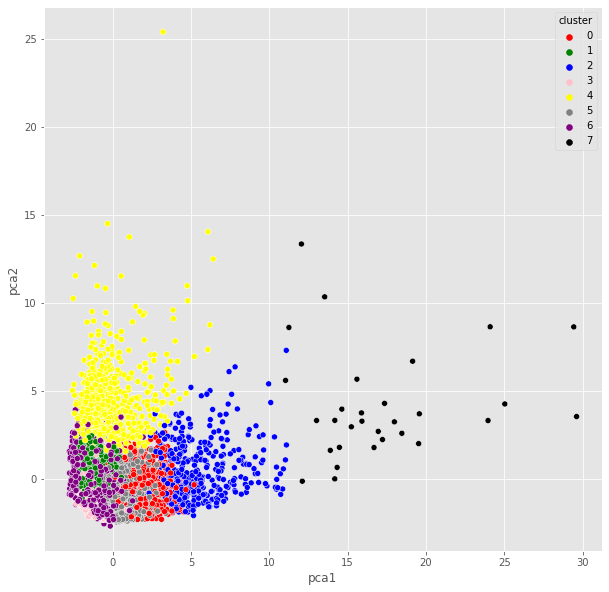

In [86]:
plt.figure(figsize=(10,10))
plt.style.use('ggplot')
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()

# Применение автоэнкодера

In [87]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

In [88]:
encoding_dim = 7

input_df = Input(shape=(17,))

x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

# encoder - используется для уменьшения размеров
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')

In [89]:
scaled_data.shape

(8950, 17)

In [90]:
autoencoder.fit(scaled_data,scaled_data,batch_size=128,epochs=25,verbose=1)

Epoch 1/25
70/70 [==============================] - 5s 57ms/step - loss: 0.8090
Epoch 2/25
70/70 [==============================] - 4s 59ms/step - loss: 0.3735
Epoch 3/25
70/70 [==============================] - 4s 57ms/step - loss: 0.2760
Epoch 4/25
70/70 [==============================] - 4s 62ms/step - loss: 0.2046
Epoch 5/25
70/70 [==============================] - 4s 58ms/step - loss: 0.1766
Epoch 6/25
70/70 [==============================] - 4s 57ms/step - loss: 0.1503
Epoch 7/25
70/70 [==============================] - 4s 61ms/step - loss: 0.1359
Epoch 8/25
70/70 [==============================] - 4s 61ms/step - loss: 0.1242
Epoch 9/25
70/70 [==============================] - 4s 61ms/step - loss: 0.1130
Epoch 10/25
70/70 [==============================] - 4s 56ms/step - loss: 0.1069
Epoch 11/25
70/70 [==============================] - 4s 57ms/step - loss: 0.1007
Epoch 12/25
70/70 [==============================] - 4s 60ms/step - loss: 0.0947
Epoch 13/25
70/70 [==================

In [91]:
autoencoder.save_weights('autoencoder.h5')

In [92]:
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 17)]              0         
_________________________________________________________________
dense_8 (Dense)              (None, 7)                 126       
_________________________________________________________________
dense_9 (Dense)              (None, 500)               4000      
_________________________________________________________________
dense_10 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_11 (Dense)             (None, 2000)              1002000   
_________________________________________________________________
dense_12 (Dense)             (None, 10)                20010     
_________________________________________________________________
dense_13 (Dense)             (None, 2000)              2200

In [93]:
pred_ac = encoder.predict(scaled_data)

In [94]:
pred_ac.shape

(8950, 10)

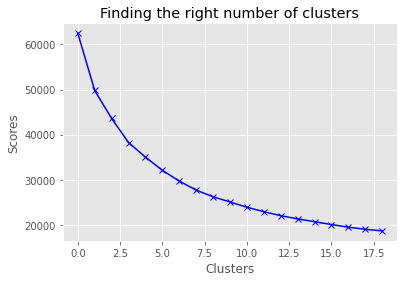

In [95]:
scores_2 = []

range_values = range(1,20)
for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(pred_ac)
    scores_2.append(kmeans.inertia_)
plt.plot(scores_2, 'bx-')
plt.style.use('ggplot')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()

по моим наблюдениям я нахожу оптимальное значение кластеров равным 4 так как кривая кажется линейной после 4


###  Сравнение обоих результатов с использованием автоэнкодеров и без использования автоэнкодеров

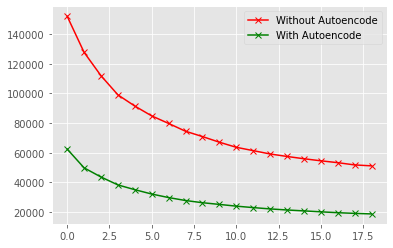

In [96]:
plt.plot(scores_1, 'bx-', color = 'r',label='Without Autoencode')
plt.plot(scores_2, 'bx-', color = 'g',label='With Autoencode')
plt.legend()

In [97]:
kmeans = KMeans(4)
kmeans.fit(pred_ac)
labels = kmeans.labels_
kmeans.cluster_centers_.shape

(4, 10)

In [98]:
y_kmeans = kmeans.fit_predict(scaled_data) 
y_kmeans

array([1, 0, 3, ..., 3, 1, 1], dtype=int32)

In [115]:
creditcard_df_cluster_new = pd.concat([df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster_new.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


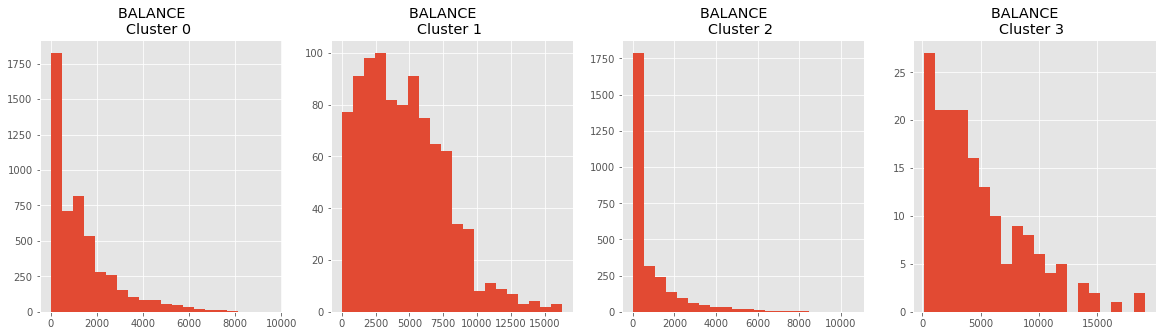

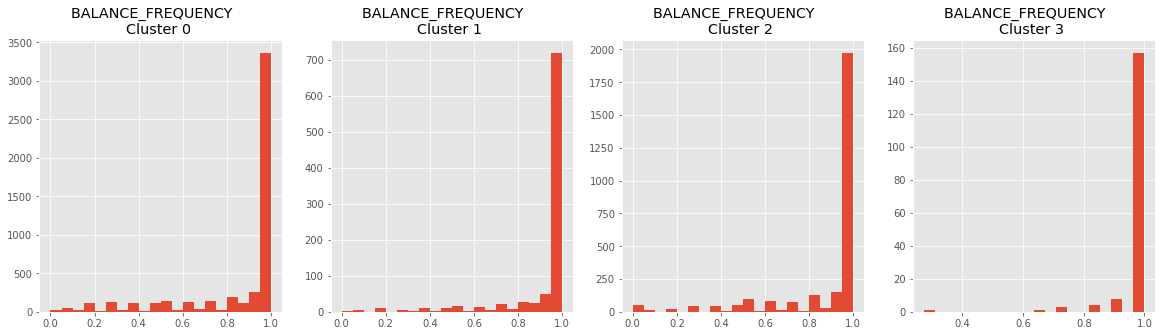

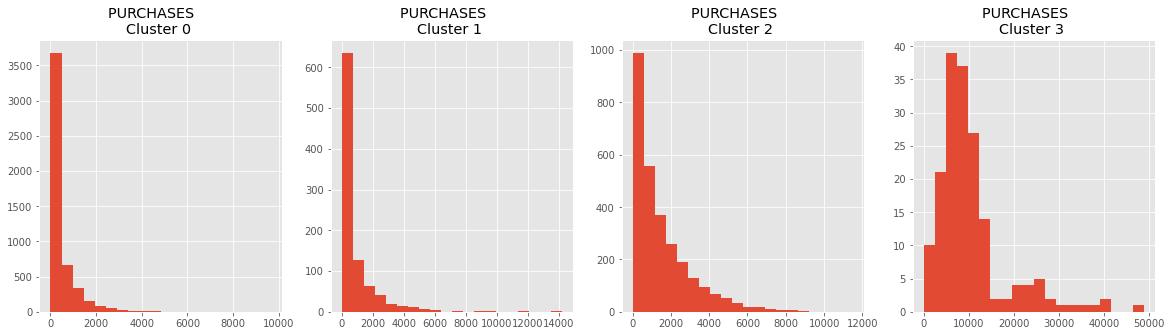

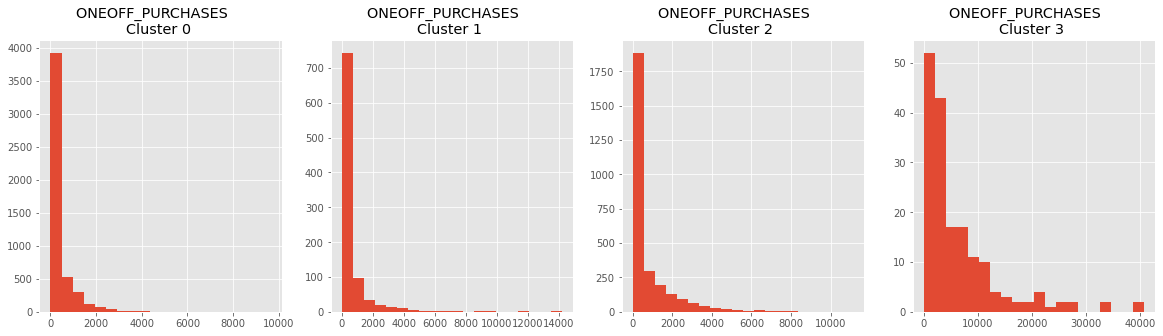

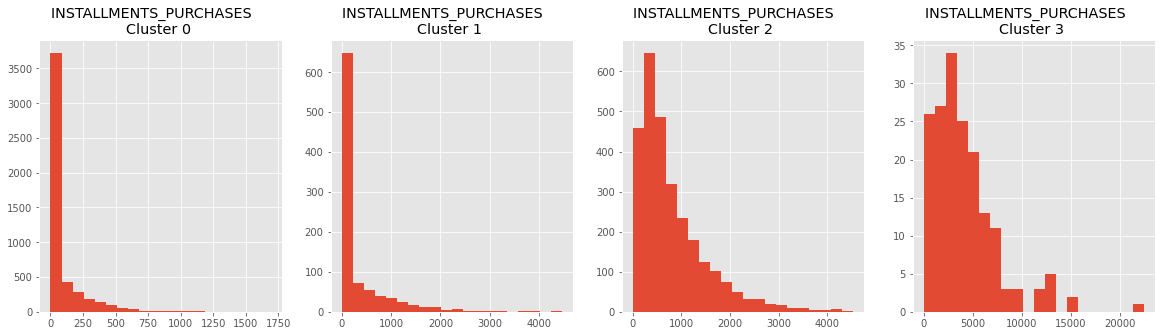

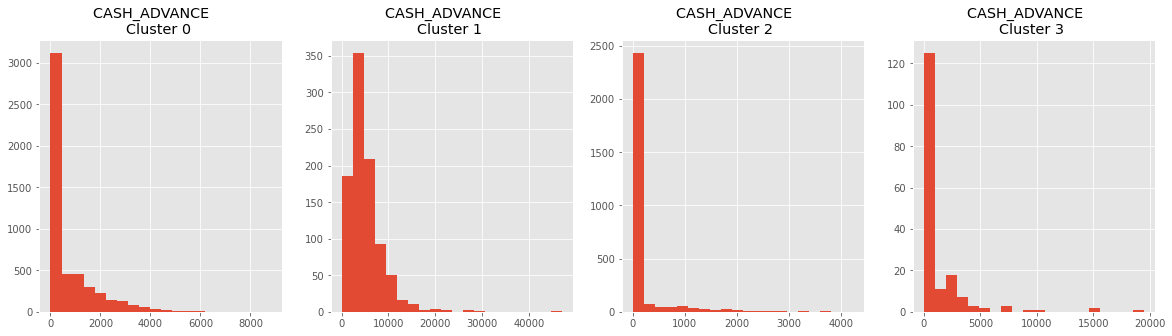

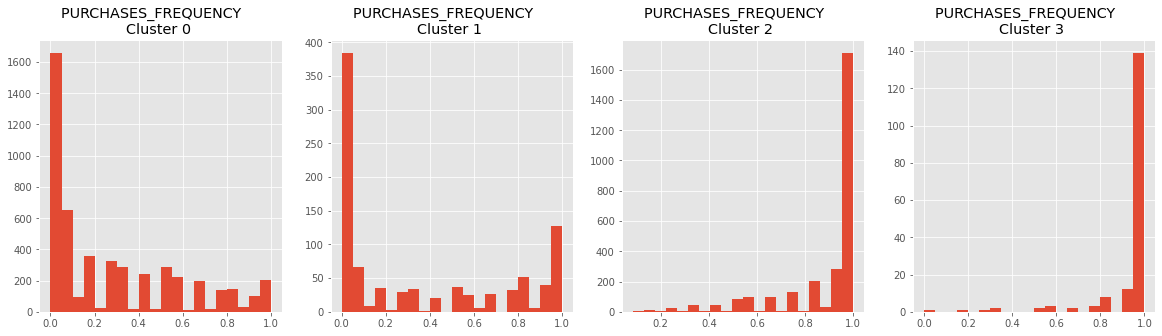

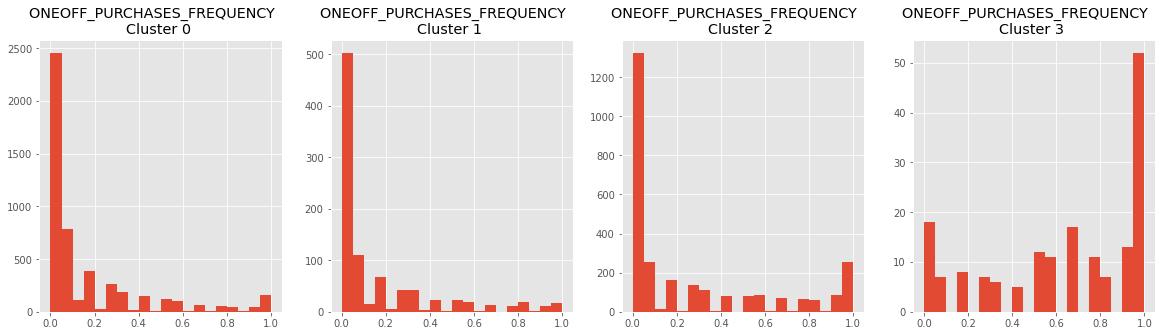

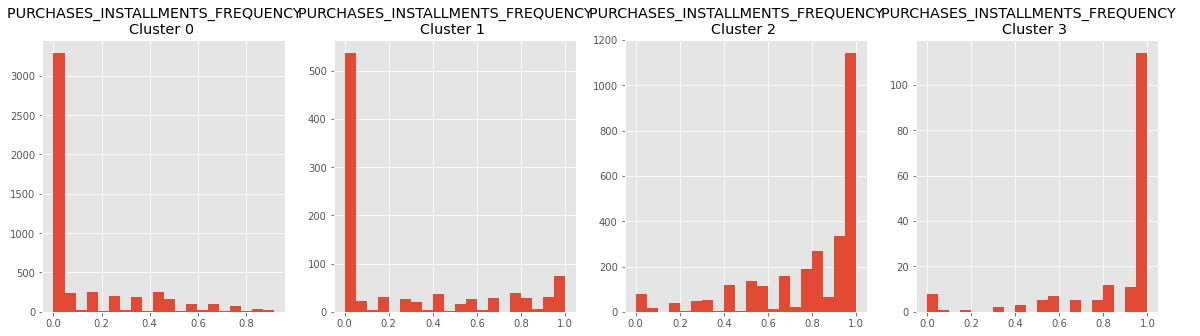

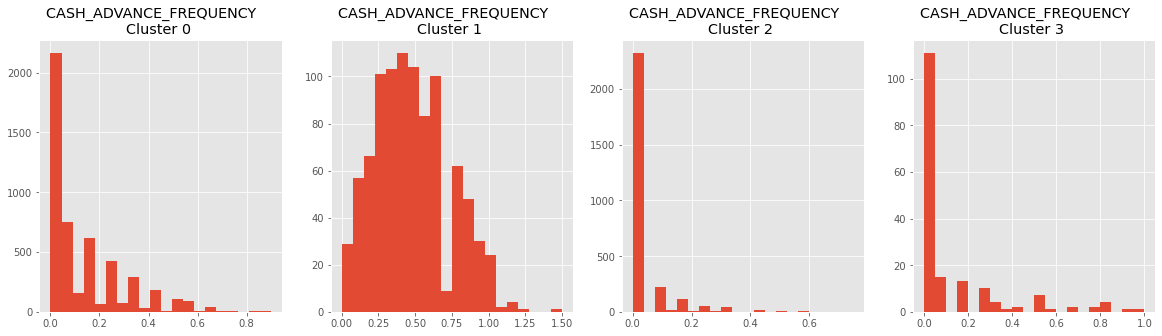

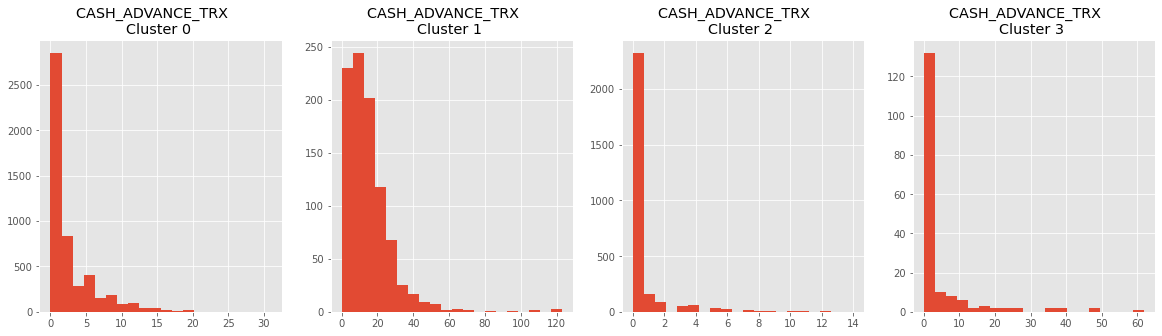

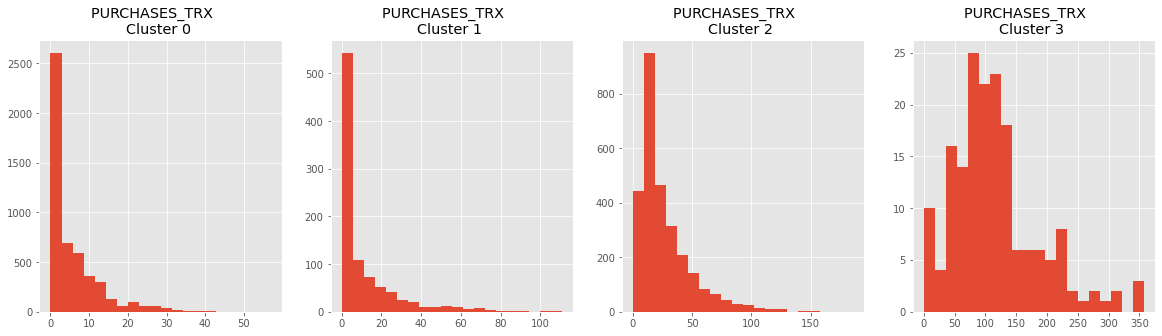

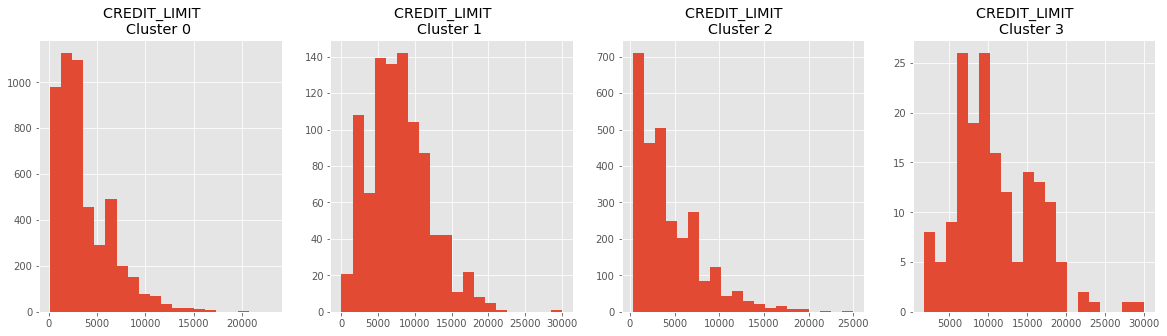

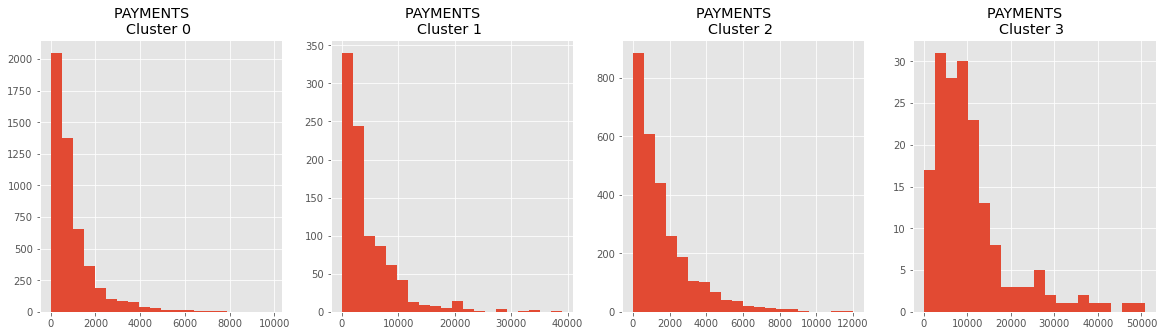

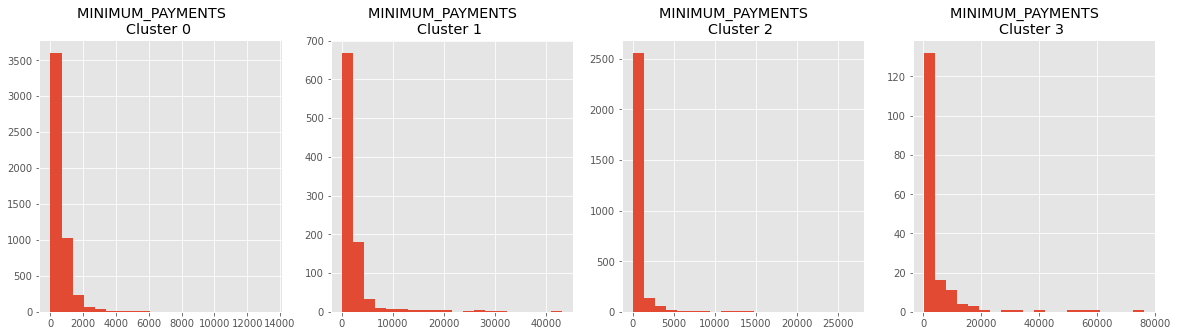

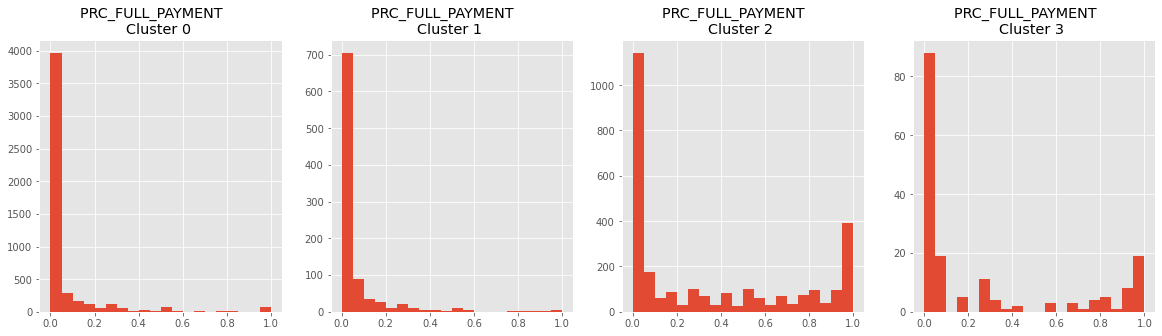

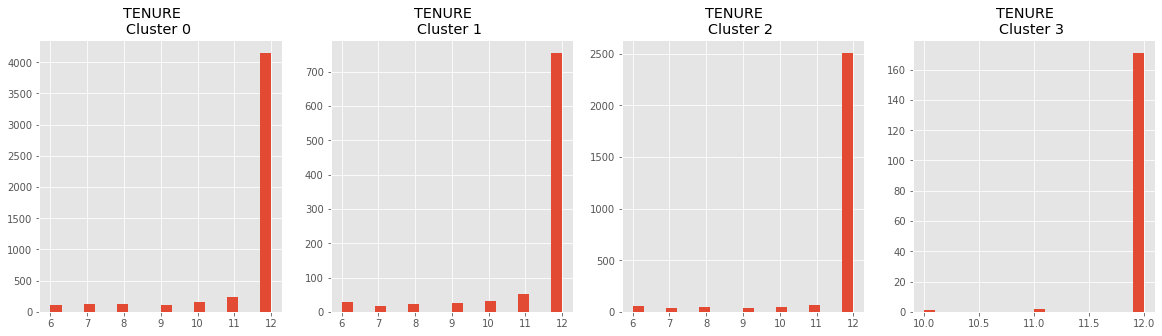

In [100]:
for i in df.columns:
  plt.figure(figsize = (20, 5))
  for j in range(4):
    plt.subplot(1,4,j+1)
    cluster = creditcard_df_cluster_new[creditcard_df_cluster_new['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()

## Применим анализ главных компонент и визуализируем результаты новых кодированных сокращенных данных

In [101]:
pca = PCA(n_components=2)
principal_comp_new = pca.fit_transform(pred_ac)
principal_comp_new

array([[-1.3308445 , -0.2231517 ],
       [-0.45850185,  1.6323389 ],
       [-0.97195154, -0.51491886],
       ...,
       [-0.39675936, -0.3349347 ],
       [-1.2556543 ,  0.6252052 ],
       [-0.795009  ,  0.34609723]], dtype=float32)

In [102]:
pca_df = pd.DataFrame(data=principal_comp_new,columns=['pca1','pca2'])
pca_df.sample(5)

,pca1,pca2
7056,-1.313009,0.337670
4548,-1.057560,-0.318407
688,-0.738855,-0.213382
4767,-1.455938,0.022540
1289,-0.571236,0.829295


In [103]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.330845,-0.223152,0
1,-0.458502,1.632339,0
2,-0.971952,-0.514919,0
3,-0.923945,0.277746,0
4,-1.612898,-0.137611,0


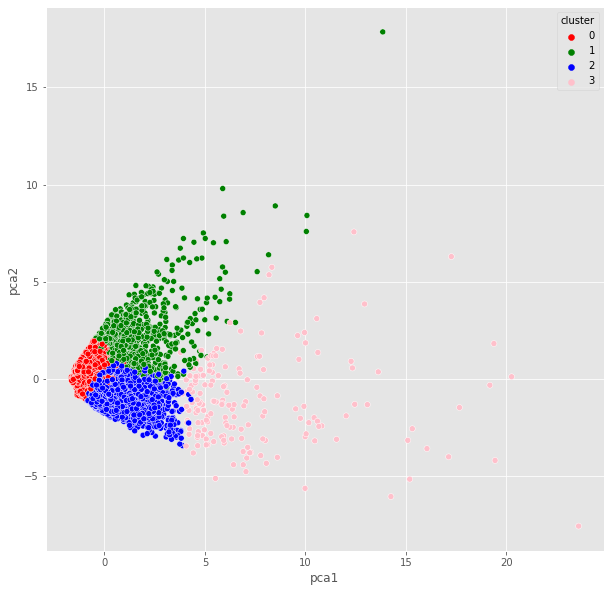

In [104]:
plt.figure(figsize=(10,10))
plt.style.use('ggplot')
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink'])
plt.show()

Здесь мы видим, что с помощью автоэнкодеров мне удалось создать кластеры данных с меньшим перекрытием. Это более значимая кластеризация/сегментация клиентов. Теперь можно сказать, что есть 4 разных типа клиентов, и к каждому из этих типов можно применить свою стратегию. Автоэнкодирование действительно помогло в случае более четкого распределения кластеров.